In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


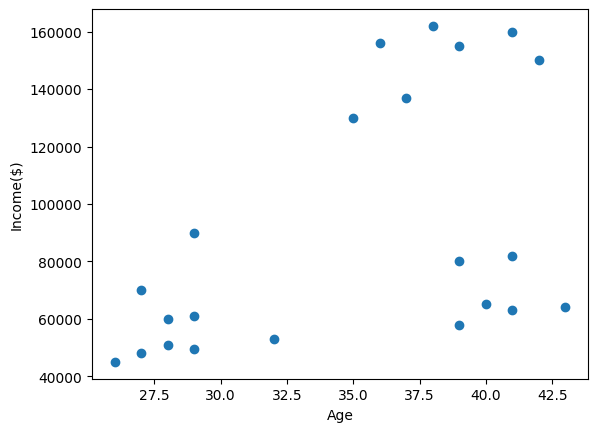

In [ ]:
plt.scatter(df['Age'],df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
km.fit(df[['Age','Income($)']])
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted
km.labels_



array([0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [ ]:
df['cluster'] = km.labels_
df['predicted'] = y_predicted
df.head()

,Name,Age,Income($),cluster,predicted
0,Rob,27,70000,2,2
1,Michael,29,90000,2,2
2,Mohan,29,61000,2,2
3,Ismail,28,60000,2,2
4,Kory,42,150000,1,1


<Axes: xlabel='Age', ylabel='Income($)'>

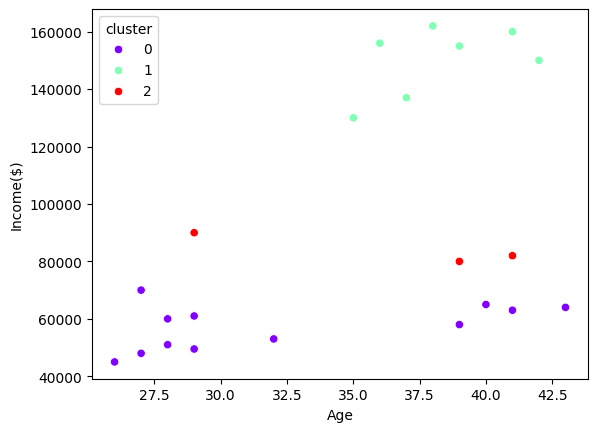

In [ ]:
sns.scatterplot(x='Age',y='Income($)',data=df,hue='cluster',palette='rainbow')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_scaled = pd.DataFrame(columns=['Age','Income($)'])
df_scaled[['Age','Income($)']] = scaler.fit_transform(df[['Age','Income($)']])
df_scaled.head()



,Age,Income($)
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


In [ ]:
km = KMeans(n_clusters=3)
km.fit(df_scaled[['Age','Income($)']])
y_predicted = km.fit_predict(df_scaled[['Age','Income($)']])
df_scaled['cluster'] = km.labels_
df_scaled['predicted'] = y_predicted
df_scaled.head()

,Age,Income($),cluster,predicted
0,0.058824,0.213675,0,0
1,0.176471,0.384615,0,0
2,0.176471,0.136752,0,0
3,0.117647,0.128205,0,0
4,0.941176,0.897436,2,2


In [ ]:
centroids = km.cluster_centers_
centroids

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

<Axes: xlabel='Age', ylabel='Income($)'>

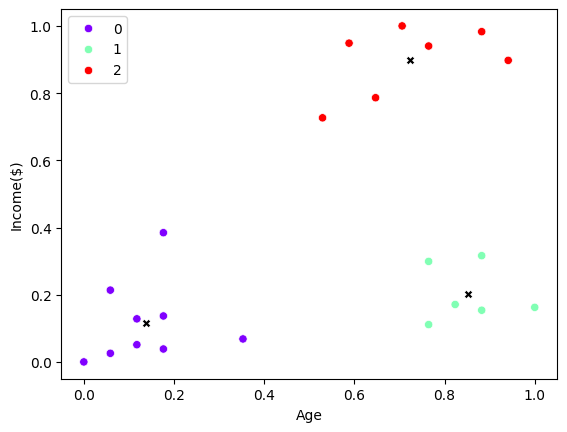

In [ ]:
sns.scatterplot(x='Age',y='Income($)',data=df_scaled,hue='cluster',palette='rainbow')
sns.scatterplot(x=centroids[:, 0],y=centroids[:, 1],color='black',marker='X')

In [ ]:
sse = []

k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_scaled[['Age','Income($)']])
    sse.append(km.inertia_)

sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3625079900797329,
 0.2621792762345213,
 0.22020960864009395,
 0.21610787119504182,
 0.1654758916625654,
 0.11348973978731772]

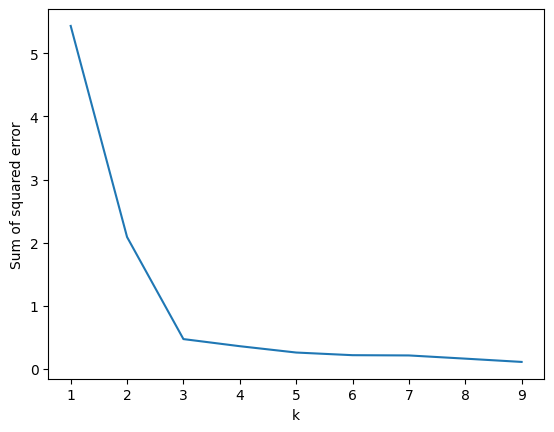

In [ ]:
plt.xlabel('k')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
plt.show()